Importing Library


In [8]:
from random import seed
from random import randrange
import matplotlib.pyplot as plt
from csv import reader
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
import numpy as np

XBOOST

In [4]:
def load_csv(filename):
	file = open(filename, "rt")
	lines = reader(file)
	dataset = list(lines)
	return dataset
 
def str_column_to_float(dataset, column):
	for row in dataset:
		row[column] = float(row[column].strip())

dataset=load_csv("parkinsons_data.csv")
for i in range(len(dataset[0])):
	str_column_to_float(dataset, i)

dataset_copy=list(dataset)
X=[]
for row in dataset:
  f=[]
  for _ in range(0,len(row)-1):
    f.append(row[_])
  X.append(f)


Y=[row.pop(len(row)-1) for row in dataset]

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=1)


model=XGBClassifier()
model.fit(X_train,Y_train)

y_pred=model.predict(X_test)
predictions=[round(value) for value in y_pred]
score=accuracy_score(Y_test,y_pred)
print(score)


0.9387755102040817


Graphical Analysis


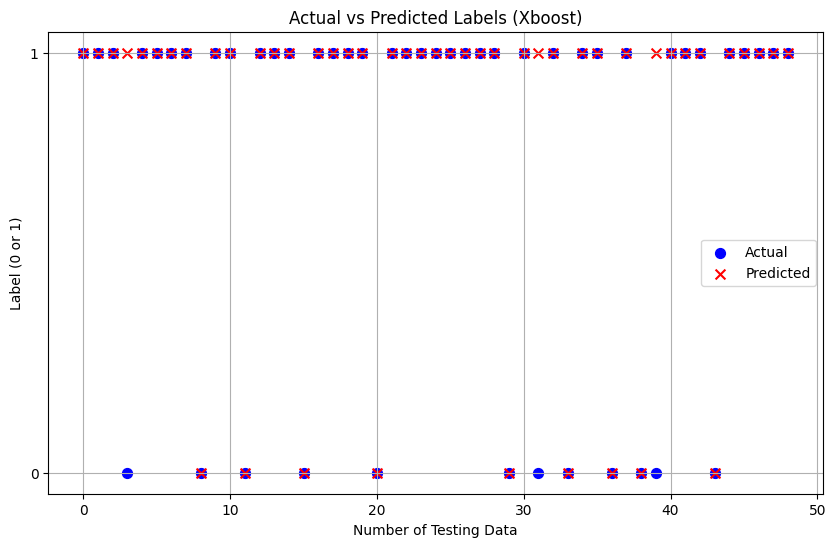

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(Y_test)), Y_test, color='blue', label='Actual', marker='o', s=50)
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted', marker='x', s=50)

plt.xlabel('Number of Testing Data')
plt.ylabel('Label (0 or 1)')
plt.title('Actual vs Predicted Labels (Xboost)')
plt.yticks([0, 1])
plt.legend()
plt.grid(True) 
plt.show()


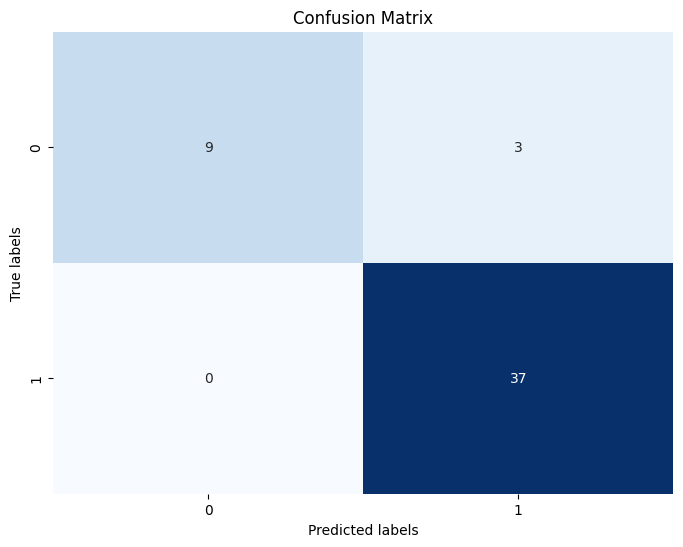

In [6]:
cm = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

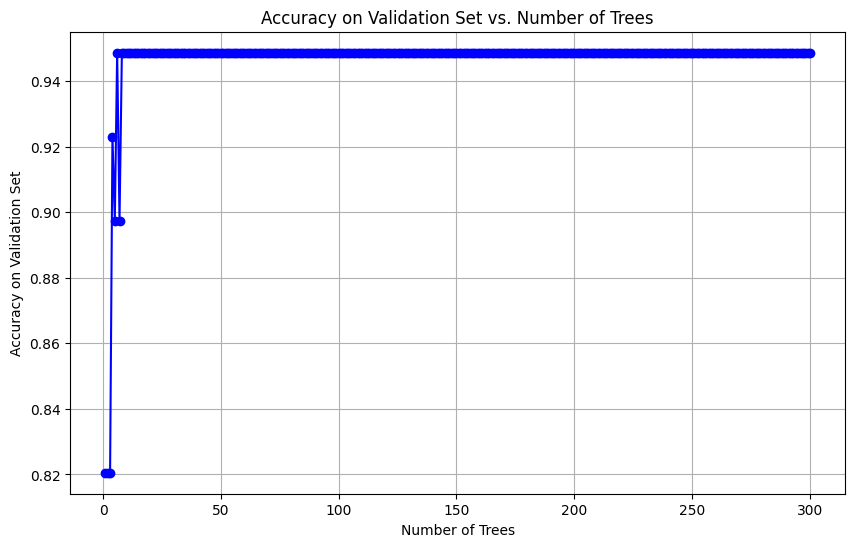

Test Accuracy using the best model: 0.8974358974358975


In [9]:
X_train, X_temp, y_train, y_temp = train_test_split(X, Y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize XGBoost Classifier
xgb_classifier = XGBClassifier()

# Lists to store accuracy on validation set after each iteration
accuracy_val_list = []

for i in range(1, 301):  # Iterate over 300 trees
    xgb_classifier.n_estimators = i
    xgb_classifier.fit(X_train, y_train)
    y_pred_val = xgb_classifier.predict(X_val)
    accuracy_val = accuracy_score(y_val, y_pred_val)
    accuracy_val_list.append(accuracy_val)

# Plot accuracy on validation set vs. number of trees
plt.figure(figsize=(10, 6))
plt.plot(range(1, 301), accuracy_val_list, marker='o', color='blue')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy on Validation Set')
plt.title('Accuracy on Validation Set vs. Number of Trees')
plt.grid(True)
plt.show()

# Select the number of trees that gives the highest accuracy on the validation set
best_num_estimators = np.argmax(accuracy_val_list) + 1  # Add 1 to account for 0-based indexing

xgb_classifier.n_estimators = best_num_estimators
xgb_classifier.fit(X_train, y_train)

# Evaluate the best model on the test set
y_pred_test = xgb_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print('Test Accuracy using the best model:', test_accuracy)